# Eigengenes for flu progression

Despite much progress in recent centuries, infectious disease continues to be one of humanity's most persistent problems. The recent COVID-19 outbreak is of course no exception to that. To understand and ultimately contain infectious diseases, it is helpful to understand how the human immune system responds to them, especially at the cellular and molecular level.

In a study published in *PLoS genetics* a cohort of 16 healthy human volunteers received intranasal inoculation of influenza H3N2/Wisconsin and 9 of these subjects developed mild to severe symptoms based on standardized symptom scoring [1]. In the week following inoculation, the patient's blood was drawn every 8 hours for microarray analysis. The resulting dataset contains 268 samples: 16 patients and about 17 samples from each patient. Patients were classified as "asymptomatic" if the Jackson score (which is a symptom score that indicates actual infection) was less than 6 over the first five days of observation and viral shedding was not documented after the first 24 hours subsequent to inoculation. The other patients were labeled "symptomatic".

In this practical session you will analyse this data set using PCA. You will chart the course of flu infection and try to identify genes that are involved.

> [1] Huang, Yongsheng, et al. Temporal dynamics of host molecular responses differentiate symptomatic and asymptomatic influenza A infection. PLoS genetics 7.8 (2011).

Let's start by loading the data.

In [0]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554/master/practicum/5._Dimensionality_reduction/flu.csv")

In [2]:
data.head(5)

,10002_at,10003_at,10004_at,10005_at,10006_at,10007_at,10009_at,1000_at,10010_at,10013_at,10014_at,10015_at,10016_at,10017_at,10018_at,10019_at,1001_at,10020_at,10021_at,10022_at,10023_at,10024_at,10025_at,10026_at,1002_at,10036_at,10038_at,10039_at,1003_at,10040_at,10042_at,10043_at,10045_at,10046_at,10047_at,10048_at,10049_at,1004_at,10050_at,10051_at,...,9955_at,9956_at,9957_at,9958_at,995_at,9960_at,9961_at,9962_at,9966_at,9967_at,9968_at,996_at,9970_at,9971_at,9972_at,9973_at,9975_at,9976_at,9978_at,997_at,9980_at,9982_at,9984_at,9985_at,9986_at,9987_at,9988_at,9989_at,998_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at,999_at,9_at,subject,type,time
0,0.032525,0.015096,-0.274163,-0.333238,-0.133675,0.029634,0.041531,0.112252,-0.025757,0.117923,0.038419,-0.142143,-0.116986,0.122293,-0.128497,-0.280822,0.075082,0.346623,0.014129,-0.002880,0.045779,0.010661,0.403579,-0.208967,-0.189865,0.039478,-0.017924,-0.041987,0.026132,-0.032872,-0.120758,-0.035242,-0.021681,0.310535,-0.108795,-0.030403,-0.174617,-0.069222,-0.078404,-0.202217,...,-0.039146,-0.050218,0.046251,-0.600171,-0.108020,-0.169235,-0.086491,-0.066543,-0.137125,-0.628699,0.042803,0.023904,0.189577,-0.219614,0.114545,0.261683,-0.893769,-0.270312,0.332876,0.904662,0.309453,-0.115536,0.107293,-0.078429,-0.052896,0.181055,-0.053916,-0.175346,-0.090403,0.154224,-0.098528,0.000522,-0.119943,-0.150252,-0.844311,0.013486,-0.472906,1,symptomatic,0
1,-0.063798,-0.054563,-0.044692,-0.251884,-0.080583,-0.360632,-0.020238,-0.094011,0.082352,0.196478,-0.029710,-0.213282,-0.199538,-0.000933,0.129928,-0.481661,-0.133644,0.308328,-0.048114,0.046858,0.146557,-0.403086,0.531657,-0.141109,-0.207053,-0.086219,0.138437,-0.068934,0.196372,0.030675,-0.094817,-0.079818,-0.156834,0.360925,0.191889,0.174202,-0.103719,-0.036049,-0.140284,0.139690,...,-0.046839,-0.326177,0.290745,-0.291339,-0.089338,-0.206806,0.026018,-0.317953,0.020617,-0.282401,0.128022,0.140927,-0.093781,-0.264891,0.147179,0.316925,-1.143827,0.150734,0.602605,1.288199,0.164399,-0.110928,0.168382,-0.111451,0.151094,0.214930,0.042183,-0.044566,-0.002653,0.234627,0.033788,-0.111438,-0.163886,0.286530,-0.773889,-0.000414,-0.254953,1,symptomatic,1
2,0.197434,0.106990,0.004244,-0.214974,-0.339999,-0.270067,0.055495,0.068424,-0.113263,0.220205,-0.031734,-0.408570,-0.153908,0.494323,0.426128,-0.740192,0.038496,-0.094383,0.009295,0.319151,0.003655,0.330515,0.522684,0.007673,-0.297769,-0.133257,-0.065865,-0.127185,-0.035920,0.167031,-0.255041,-0.021566,-0.132681,0.086252,0.238756,-0.070437,-0.165218,0.080383,0.087621,-0.241557,...,0.269118,0.308835,-0.183812,-0.711316,0.220033,-0.296430,-0.113155,-0.479546,0.134478,-0.536046,0.014172,0.051601,-0.071578,0.048442,-0.169222,0.268082,-1.185599,-0.126099,0.500759,1.133857,-0.198683,-0.118738,0.010940,-0.487648,0.421392,-0.117645,-0.419944,0.036090,0.023931,0.443557,0.002347,0.060106,-0.291948,-0.177728,-1.022652,-0.000998,-0.733726,1,symptomatic,2
3,-0.038433,0.040574,0.015154,-0.245311,-0.053418,-0.070803,0.271969,-0.142061,0.229480,-0.002120,-0.076142,-0.241092,-0.024590,-0.020637,0.494051,-0.479712,-0.160798,0.343081,-0.209239,0.041406,-0.046507,-0.260105,0.480487,0.306200,0.289869,-0.126458,0.080491,-0.157446,-0.153034,-0.100528,-0.040803,-0.157614,0.017535,0.234328,0.043602,0.216314,-0.061853,-0.042389,-0.201810,0.216841,...,-0.185058,-0.183490,0.039758,-0.360694,-0.231748,-0.169172,-0.057880,-0.260352,-0.012623,-0.340255,0.018726,0.331413,-0.053059,-0.095850,0.063738,0.418723,-0.608945,0.280404,0.577157,1.240089,0.244168,-0.276294,0.089062,-0.535223,-0.075699,0.240028,-0.116734,0.084119,-0.052088,0.246433,0.196170,-0.194425,-0.215175,0.089734,-0.814457,0.028076,-0.471819,1,symptomatic,3
4,0.044036,-0.111893,0.314011,0.030471,-0.031469,-0.014274,0.003590,-0.079671,0.371623,0.051905,0.003762,-0.213712,0.059706,-0.035160,-0.032280,-0.528684,0.066557,-0.103789,-0.327135,0.064744,-0.081990,-0.428416,0.796471,0.552036,-0.131493,-0.062789,-0.046261,0.008918,0.110789,0.017626,0.109385,-0

The microarray used in this study measures 11959 normalized gene expression values. There are three more columns in the data set:

- 'subject': identifies the volunteer
- 'type': the symptom annotation
- 'time': the timepoint of the microarray measurement

Let's plot a heatmap of the expression values for some of the genes of subject 2:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


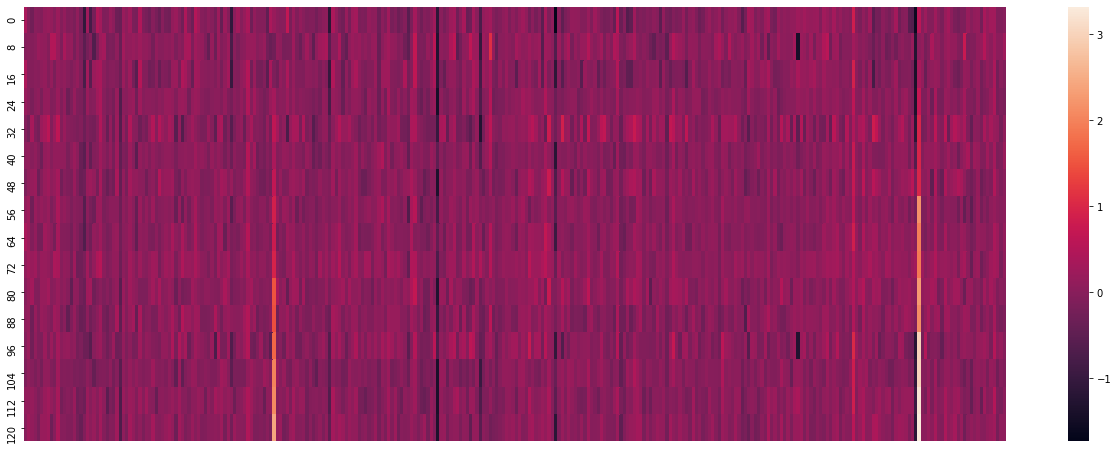

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22,8))
sns.heatmap(data[data.subject==2].iloc[:,200:500],square=False,xticklabels=False,yticklabels=range(0,128,8))
plt.show()

In this heatmap the genes are on the x-axis (gene names not shown here), the time (in hours) is on the y-axis. The color levels indicate the expression measurements of the genes. 

*Do you see something interesting? Yes? What is it?*

---(Answer here)

---(Solution)
There are two genes that seem to change expression over time much more than the other genes. These changes seem correlated to 'time'.

*Make the same plot for subject 1.*

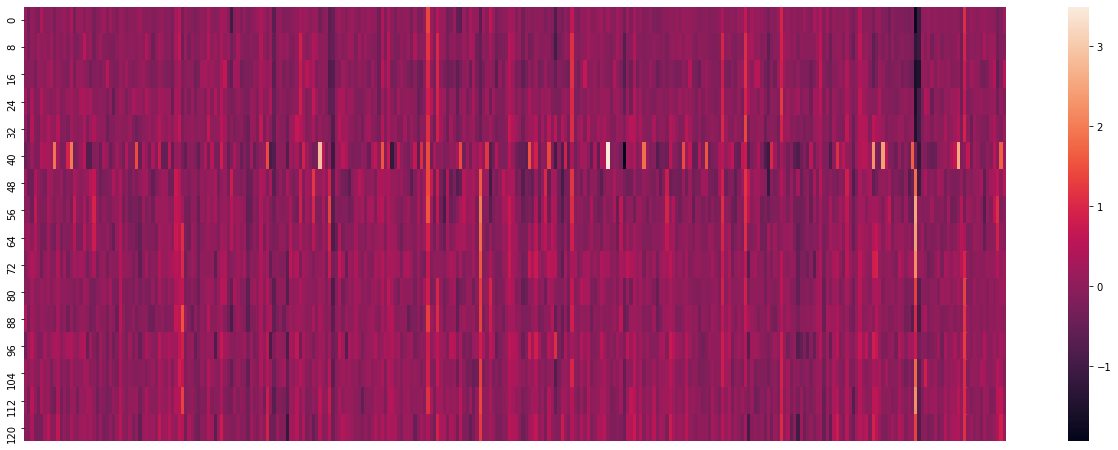

In [4]:
plt.figure(figsize=(22,8))
###Start code here
sns.heatmap(data[data.subject==1].iloc[:,200:500],square=False,xticklabels=False,yticklabels=range(0,128,8))
###End code here
plt.show()

*Do you see something strange?*

---(Answer here)

---(Solution) 
One microarray at time point 40 seems way off.

*Pop the column 'subject' in a variable called `subjects`.*

*Pop the column 'type' in a variable called`types`.* 

*Pop the column 'time' in a variable called `times`.*

In [0]:
###Start code here
subjects = data.pop('subject')
types = data.pop('type')
times = data.pop('time')
###End code here

*When you apply PCA on the data set `data` to reduce the 11959 genes (the features), how many principal components do we require to explain at least 80% of the data? Check the scikit-learn webpage for help on how to obtain the explained variance ratio in the PCA module.*

In [6]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca.fit_transform(data)

###Start code here
print(np.sum(pca.explained_variance_ratio_[:16]))
print(np.sum(pca.explained_variance_ratio_[:17]))
###End code here

0.7931857427838374
0.8025045050834396


Let's reduce the number of principal components to just two and store them in a Pandas DataFrame called `data_projected`:

In [0]:
pca = PCA(n_components=2)
data_projected = pd.DataFrame(pca.fit_transform(data),columns=['PC1','PC2'])

*How much of the variance do these two principal components explain?*

In [8]:
###Start code here
print(np.sum(pca.explained_variance_ratio_))
###End code here

0.4137246487992573


Let's add the variables `subjects`, `types` and `times` as columns to `data_projected`:

In [0]:
data_projected['subject'] = subjects
data_projected['type'] = types
data_projected['time'] = times

*Use the Seaborn `.lmplot()` method to plot the projected data:*

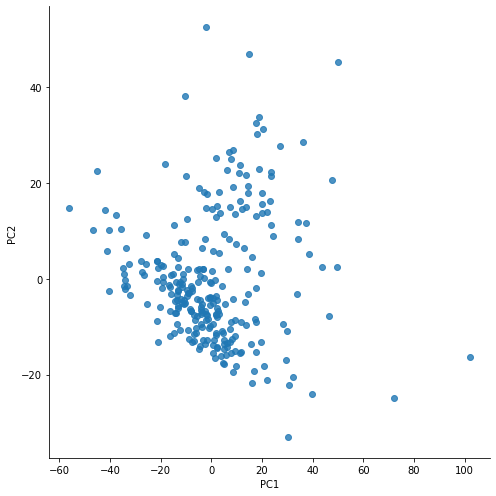

In [10]:
###Start code here
sns.lmplot(x="PC1",y="PC2",data=data_projected, fit_reg=False,height=7)
###End code here
plt.show()

*Make the same plot, but color the data points by 'type' (use the 'hue' argument):*


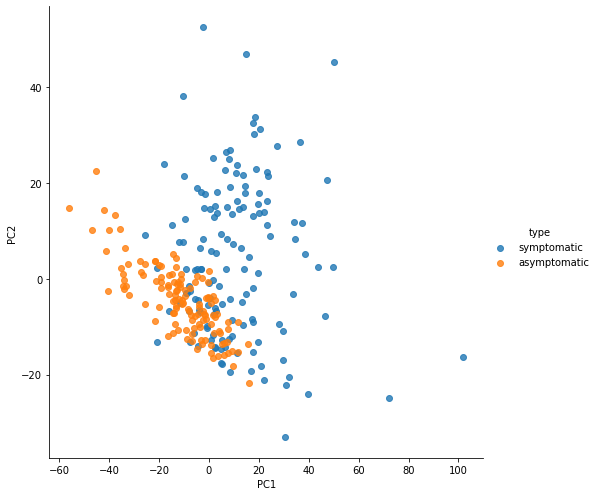

In [11]:
###Start code here
sns.lmplot(x="PC1",y="PC2",data=data_projected, hue='type', fit_reg=False, height=7)
###End code here
plt.show()

*What do you see?*

---(Answer)

---(Solution) There is clearly separation, 'symptomatic' is more spread out, 'asymptomatic' seems to follow some linear relationship between PC1 and PC2.

*Color the microarray measurements by 'subject' and split by 'type' (use the 'col' argument):* 


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


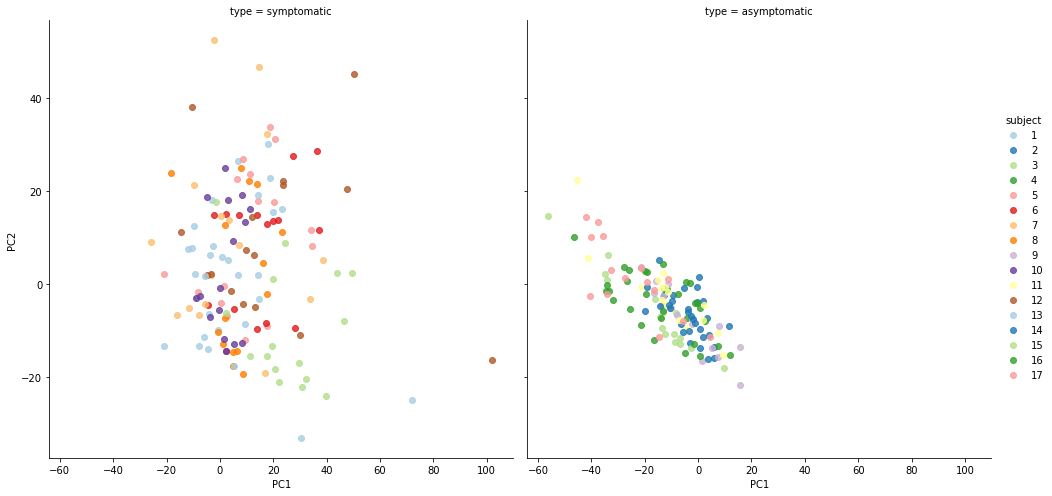

In [12]:
sns.lmplot(x="PC1",y="PC2",data=data_projected, col='type', hue='subject', fit_reg=False, size=7, palette="Paired")
plt.show()

*Do the volunteers cluster together?*

---(Answer)

---(Solution) Not, maybe for some subjects.

The first two principal components can separate many of the symptomatic subjects from the asymptomatic ones. However, not all of them. Probably 'time' has something to do with this...

Let's take a look at what we have found. We could say that we reduced the 11959 genes to just two 'eigengenes' (PC1 and PC2). These  eigengenes explain most of the variation observed over all subjects and time points. 

*Use the seaborn function `catplot()` to plot the data set `data_projected` as a pointplot with on the x-axis column 'time' and on the y-axis the values for the first eigengene. Color the eigengene by column 'subject' and spit the plot by column 'type':*

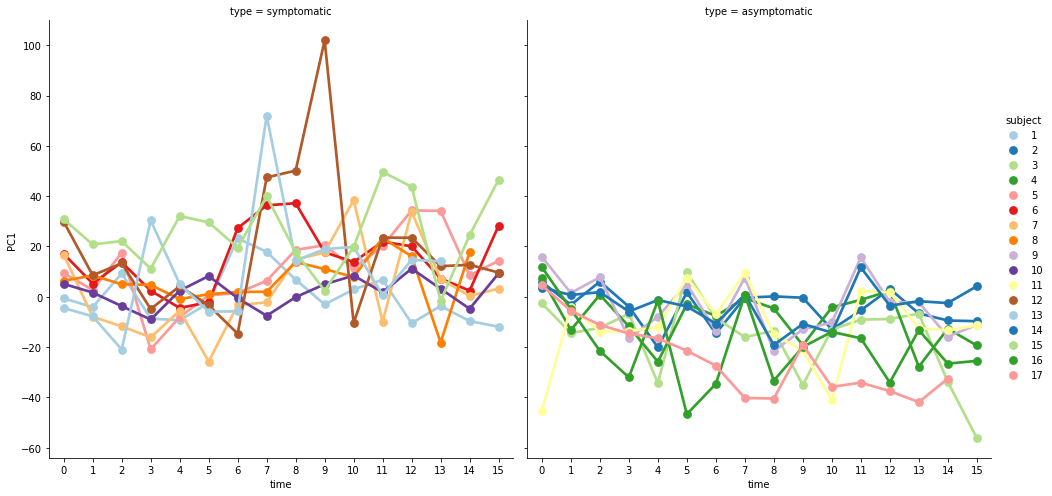

In [26]:
sns.catplot(kind="point",x='time',y='PC1',data=data_projected,col='type',hue="subject",height=7,palette="Paired")
plt.show()

*What do you see?*

---(Answer)

---(Solution) The expression profiles for eigengene PC1 seem to differ between symptomatic and asymtomatic subjects, this difference is more pronounced for some subject compared to other subjects.

*Do the same for the second eigengene PC2.*

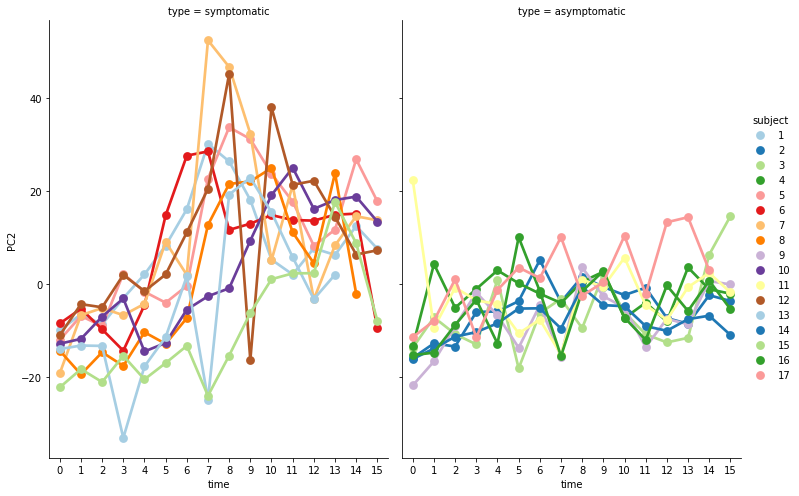

In [27]:
sns.catplot(kind="point",x='time',y='PC2',data=data_projected,col='type',hue="subject",height=7,aspect=.75,palette="Paired")
plt.show()

*Do we see something similar?*

---(Answer)

---(Solution) Yes.

*Now create the same plot for the first eigengene but remove the coloring by column 'subject'.This will create a summary plot where each point is the mean value for the first eigengene over all volunteers. The error bars estimate the variation between the volunteers (95% confidence interval):*

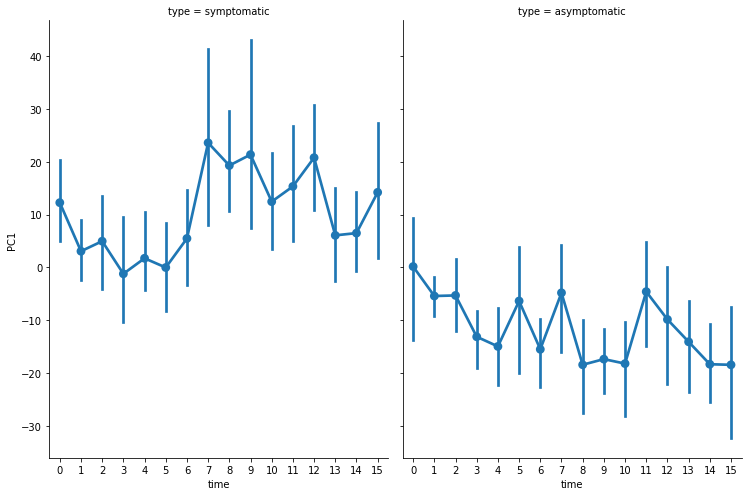

In [25]:
sns.catplot(kind="point",x='time',y='PC1',data=data_projected,col='type',height=7,aspect=.75, ci=95)
plt.show()

*Do the same for the second eigengene.*

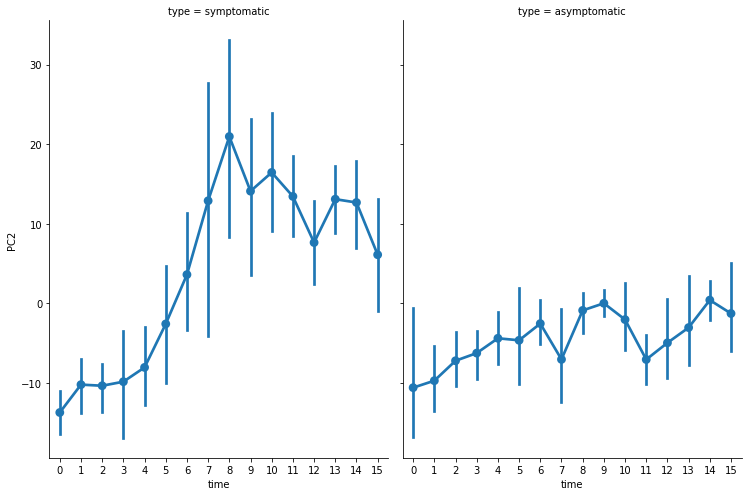

In [28]:
sns.catplot(kind="point",x='time',y='PC2',data=data_projected,col='type',height=7,aspect=.75, ci=95)

By now you should have noticed how both eigengenes show very different behavior between the symptomic and the asymptomic subjects (on average). We can even see when after inoculation of influenza H3N2/Wisconsin gene expression starts to change for the symptopic subjects.

The eigengenes of course don't have much biological meaning. They are a weighted linear combination of the original genes. So, by looking at the magnitude of these weights we can learn about the contribution of each gene to each eigengene. 

*Create a Pandas DataFrame called `pca_weights` with two columns:*

- *'genes' that contains the gene names*
- *'weights' that contains the absolute value of the weights in the first eigengene*

In [0]:
pca_weights = pd.DataFrame()
pca_weights['genes'] = data.columns.values
pca_weights['weights'] = np.abs(pca.components_[0])

*Sort this DataFrame by column 'weights' in descending order*:

In [18]:
pca_weights.sort_values(['weights'],ascending=False).head()

,genes,weights
11218,91543_at,0.047832
9070,710_at,0.046689
3342,27074_at,0.042310
767,10964_at,0.039760
5012,439992_at,0.039164


*So? Did we find something interesting? How about the second eigengene? Find the 5 most interesting genes for the second eigengene.*

In [19]:
pca_weights = pd.DataFrame()
pca_weights['genes'] = data.columns.values
pca_weights['weights'] = np.abs(pca.components_[1])

pca_weights.sort_values(['weights'],ascending=False).head()

,genes,weights
11218,91543_at,0.110752
4262,3434_at,0.109929
767,10964_at,0.098781
472,10561_at,0.093607
3342,27074_at,0.091978
